# TAREA NO. 2 - Estadística Multivariada

## Explicación de la base de datos:

El World Happiness Report evalúa el bienestar de los países en base a varios factores, utilizando distintas métricas que ayudan a explicar los niveles de felicidad de la población. A continuación te explico a qué se refiere cada una de las características de esta base de datos:

- Country name (Nombre del país): Se refiere al nombre oficial del país que está siendo evaluado en el reporte.

- Year (Año): Es el año en el que se recolectaron los datos o se realizó el análisis para el reporte.

- Life Ladder (Escalera de la vida): Este es un indicador de bienestar subjetivo, en el cual se pide a las personas que califiquen su vida en una escala del 0 (la peor vida posible) al 10 (la mejor vida posible) según su propia percepción.

- Log GDP per capita (Logaritmo del PIB per cápita): Representa el logaritmo del Producto Interno Bruto (PIB) per cápita ajustado por poder adquisitivo. El PIB per cápita es una medida del nivel de vida en un país. El logaritmo se usa para escalar los datos y manejar mejor las diferencias entre los países.

- Social support (Apoyo social): Se refiere a la percepción de las personas sobre si tienen o no a alguien en quien puedan confiar en momentos de necesidad. Es un indicador de la red de apoyo social que tienen los individuos.

- Healthy life expectancy at birth (Esperanza de vida saludable al nacer): Estima cuántos años se espera que una persona viva con buena salud desde su nacimiento. Este indicador combina la longevidad con la calidad de vida en términos de salud.

- Freedom to make life choices (Libertad para tomar decisiones de vida): Mide la percepción de las personas sobre su libertad para tomar decisiones importantes en sus vidas, como elegir su ocupación, lugar de residencia, entre otros.

- Generosity (Generosidad): Este indicador evalúa la disposición de las personas a donar dinero o ayudar a los demás, basándose en la cantidad de actos altruistas reportados por los encuestados.

- Perceptions of corruption (Percepciones de corrupción): Mide la percepción de la corrupción en el gobierno y las instituciones empresariales dentro del país. Un valor alto indica una mayor percepción de corrupción.

- Positive affect (Afecto positivo): Representa la frecuencia con la que las personas experimentan emociones positivas como felicidad, risa y disfrute en su vida diaria.

- Negative affect (Afecto negativo): Refleja la frecuencia con la que las personas experimentan emociones negativas como el estrés, la tristeza y el enojo.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

## 1. Cargar los datos

### 1.1. Cargar los datos desde el entorno local

In [17]:
df = pd.read_csv("world-happiness-report.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


### 1.2. Filtrar los datos y obtener la información de interés

Ya que la base de datos tiene más de 1000 observaciones y se quiere es hacer una análisis que permita observar el dendograma, se va a filtrar la base de datos por países, donde se va a restringir el análisis para Colombia, como se muestra a continuación, resultando en solo 15  observaciones que se pueden observar fácil gráficamente.

In [18]:
# Filtrar solo a el pais 'Colombia'
df_colombia = df[df['Country name'] == 'Colombia']
df_colombia.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
357,Colombia,2006,6.025,9.277,0.910,65.22,0.805,-0.015,0.808,0.800,0.326
358,Colombia,2007,6.138,9.330,0.894,65.34,0.786,-0.040,0.860,0.808,0.287
359,Colombia,2008,6.168,9.351,0.880,65.46,0.795,-0.042,0.763,0.803,0.307
360,Colombia,2009,6.272,9.351,0.886,65.58,0.757,-0.055,0.837,0.843,0.273
361,Colombia,2010,6.408,9.384,0.893,65.70,0.816,-0.050,0.815,0.831,0.265


En este caso, las variables categóricas como PAIS y AÑO no van a ir dentro del análisis de clúster ya que no brindan información relevante. PAIS siempre es el mismo entonces no aporta nada, por otro lado, el año será la etiqueta de los datos, permitiendo agrupar las observaciones y ver en que años, en Colombia, hay mayor similitud en cuanto a la felicidad de las personas.

In [19]:
etiquetas = df_colombia['year'] # Etiquetas para los datos

df = df_colombia[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] # Seleccionar las columnas a usar
df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
357,6.025,9.277,0.910,65.22,0.805,-0.015,0.808
358,6.138,9.330,0.894,65.34,0.786,-0.040,0.860
359,6.168,9.351,0.880,65.46,0.795,-0.042,0.763
360,6.272,9.351,0.886,65.58,0.757,-0.055,0.837
361,6.408,9.384,0.893,65.70,0.816,-0.050,0.815


In [20]:
# Calcular la cantidad de valores nulos en cada columna
pd.DataFrame.isnull(df).sum()

Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [21]:
# Imputar los valores nulos con la media de la columna
# df = df.fillna(df.mean()) # Descomentar para imputar valores nulos (si los hay)

In [22]:
X = df.values
y = etiquetas.values
print("Las dimensiones de X son: ", X.shape)
print("Las dimensiones de y son: ", y.shape)

Las dimensiones de X son:  (15, 7)
Las dimensiones de y son:  (15,)


In [23]:
print("Las medias de cada columna son: ", np.mean(X, axis=0))
print("Las desviaciones estándar de cada columna son: ", np.std(X, axis=0))

Las medias de cada columna son:  [ 6.24853333  9.46933333  0.8874     66.50666667  0.81446667 -0.08046667
  0.84773333]
Las desviaciones estándar de cada columna son:  [0.21987356 0.10283104 0.02750224 0.97410928 0.02481093 0.04754207
 0.03609149]


### 1.3. Escalado de los datos

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
print("La media de cada variable es: ", X_scaled.mean(axis=0))
print("La desviación estándar de cada variable es: ", X_scaled.std(axis=0))

La media de cada variable es:  [ 7.54951657e-15  3.54346182e-15 -2.13162821e-15 -8.85217825e-15
  4.15963560e-15 -2.29446092e-16 -2.07241631e-16]
La desviación estándar de cada variable es:  [1. 1. 1. 1. 1. 1. 1.]


### 1.4. Definición de los métodos que se van a usar

Para cambiar las métricas de distancia, simplemente modifica el parámetro metric dentro de pdist. Aquí algunos ejemplos:

- Para distancia Euclidiana: pdist(X, metric='euclidean')
- Para distancia Manhattan: pdist(X, metric='cityblock')
- Para distancia Chebyshev: pdist(X, metric='chebyshev')
- Para distancia Coseno: pdist(X, metric='cosine')
- Para distancia Mahalanobis: pdist(X, metric='mahalanobis', VI=matriz_inversa_de_covarianza)

In [26]:
distancias = ["euclidean", "cityblock", "chebyshev", "cosine", "mahalanobis"]

In [27]:
metodos = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

## 2. Análisis de clúster jerárquico

### 2.1. Calculo del coeficiente cofenético

In [28]:
df_c = pd.DataFrame(columns=["Metodo", "Distancia", "Cophenet"])
cont = 0

for metodo in metodos:
    for distancia in distancias:
        if (metodo == "centroid" or metodo == "median" or metodo == "ward") and distancia != "euclidean":
            break

        Z = linkage(X_scaled, method=metodo, metric=distancia)
        c, coph_dists = cophenet(Z, pdist(X_scaled))
        c = round(c, 2)

        df_c.loc[cont] = [metodo, distancia, c]
        cont += 1

print(df_c)

      Metodo    Distancia  Cophenet
0     single    euclidean      0.67
1     single    cityblock      0.67
2     single    chebyshev      0.64
3     single       cosine      0.53
4     single  mahalanobis      0.62
5   complete    euclidean      0.72
6   complete    cityblock      0.68
7   complete    chebyshev      0.73
8   complete       cosine      0.59
9   complete  mahalanobis      0.29
10   average    euclidean      0.80
11   average    cityblock      0.79
12   average    chebyshev      0.79
13   average       cosine      0.63
14   average  mahalanobis      0.55
15  weighted    euclidean      0.79
16  weighted    cityblock      0.78
17  weighted    chebyshev      0.79
18  weighted       cosine      0.63
19  weighted  mahalanobis      0.54
20  centroid    euclidean      0.79
21    median    euclidean      0.79
22      ward    euclidean      0.68


### 2.2. Extracción de al mejor diatancia y mejor método de enlace

In [29]:
# Ordenar los métodos de enlace por su coeficiente cofenético > 0.7
df_c = df_c[df_c["Cophenet"] > 0.7].sort_values(by="Cophenet", ascending=False)
print(df_c)

      Metodo  Distancia  Cophenet
10   average  euclidean      0.80
11   average  cityblock      0.79
12   average  chebyshev      0.79
15  weighted  euclidean      0.79
17  weighted  chebyshev      0.79
20  centroid  euclidean      0.79
21    median  euclidean      0.79
16  weighted  cityblock      0.78
7   complete  chebyshev      0.73
5   complete  euclidean      0.72


### 2.3. Dendograma

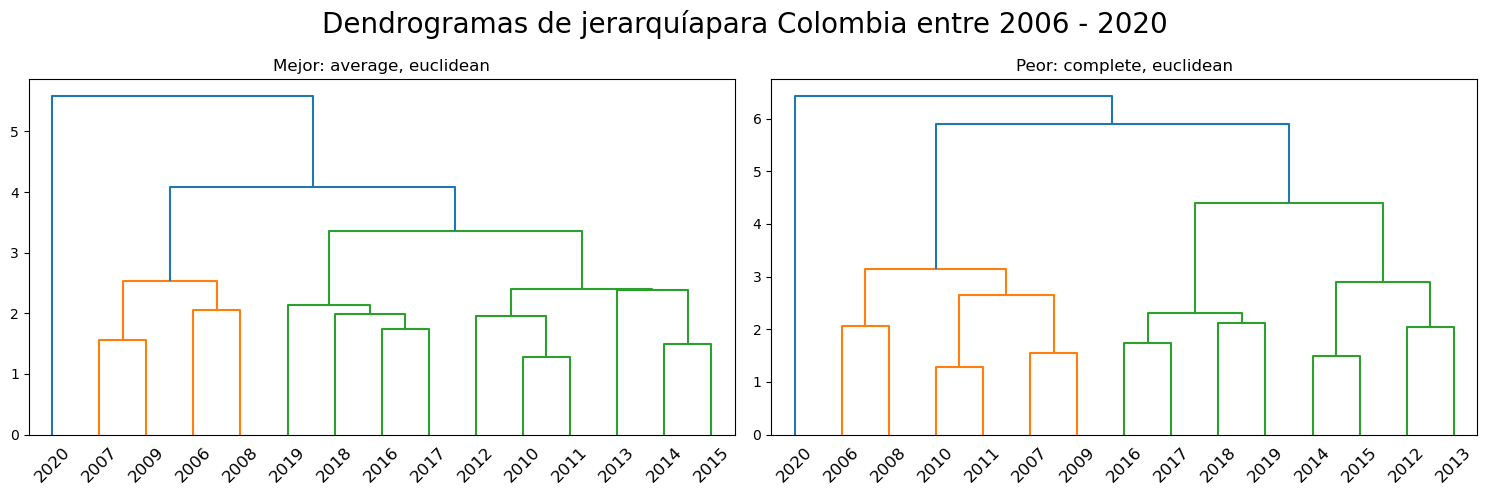

In [30]:
# graficar el dendrograma del mejor método de enlace y el peor método de enlace
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle("Dendrogramas de jerarquíapara Colombia entre 2006 - 2020", fontsize=20)

metodo_mejor = df_c.iloc[0]["Metodo"]
distancia_mejor = df_c.iloc[0]["Distancia"]
Z_mejor = linkage(X_scaled, method=metodo_mejor, metric=distancia_mejor)
dendrogram(Z_mejor, labels=y, ax=axs[0], leaf_rotation=45)
axs[0].set_title("Mejor: " + metodo_mejor + ", " + distancia_mejor)

metodo_peor = df_c.iloc[-1]["Metodo"]
distancia_peor = df_c.iloc[-1]["Distancia"]
Z_peor = linkage(X_scaled, method=metodo_peor, metric=distancia_peor)
dendrogram(Z_peor, labels=y, ax=axs[1], leaf_rotation=45)
axs[1].set_title("Peor: " + metodo_peor + ", " + distancia_peor)

plt.tight_layout()
plt.show()